In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
DATA_PATH = "../data/processed/cleaned_inventory_sales.csv"
df = pd.read_csv(DATA_PATH)
date_cols = [
    "date_received",
    "last_order_date",
    "expiration_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")
df.head()

,product_id,product_name,catagory,supplier_id,supplier_name,stock_quantity,reorder_level,reorder_quantity,unit_price,date_received,last_order_date,expiration_date,warehouse_location,sales_volume,inventory_turnover_rate,status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,4.5,2024-08-16,2024-06-29,2024-09-19,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,20.0,NaT,2024-05-29,NaT,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,6.0,NaT,NaT,2024-09-22,3296 Walton Court,31,34,Backordered
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,1.5,NaT,2025-02-19,2024-04-17,3 Westerfield Crossing,95,99,Active
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,4.0,NaT,NaT,NaT,15068 Scoville Court,62,25,Backordered


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               990 non-null    object        
 1   product_name             990 non-null    object        
 2   catagory                 990 non-null    object        
 3   supplier_id              990 non-null    object        
 4   supplier_name            990 non-null    object        
 5   stock_quantity           990 non-null    int64         
 6   reorder_level            990 non-null    int64         
 7   reorder_quantity         990 non-null    int64         
 8   unit_price               990 non-null    float64       
 9   date_received            600 non-null    datetime64[ns]
 10  last_order_date          595 non-null    datetime64[ns]
 11  expiration_date          630 non-null    datetime64[ns]
 12  warehouse_location       990 non-nul

In [12]:
df[date_cols].isnull().mean() * 100

date_received      39.393939
last_order_date    39.898990
expiration_date    36.363636
dtype: float64

In [13]:
df[[
    "stock_quantity",
    "sales_volume",
    "reorder_level",
    "reorder_quantity",
    "inventory_turnover_rate"
]].describe()

,stock_quantity,sales_volume,reorder_level,reorder_quantity,inventory_turnover_rate
count,990.000000,990.000000,990.000000,990.000000,990.000000
mean,55.609091,58.925253,51.215152,51.913131,50.150505
std,26.300775,23.002318,29.095241,29.521059,28.798954
min,10.000000,20.000000,1.000000,1.000000,1.000000
25%,33.000000,39.000000,25.250000,25.000000,25.000000
50%,56.000000,58.000000,53.000000,54.000000,50.000000
75%,79.000000,78.000000,77.000000,77.000000,74.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000


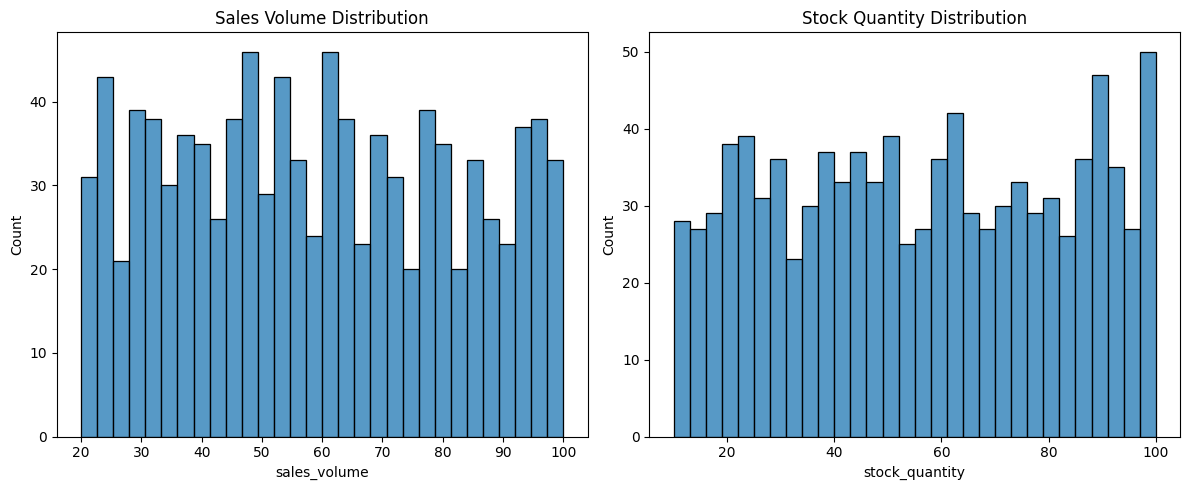

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["sales_volume"], bins=30)
plt.title("Sales Volume Distribution")

plt.subplot(1,2,2)
sns.histplot(df["stock_quantity"], bins=30)
plt.title("Stock Quantity Distribution")

plt.tight_layout()
plt.show()

In [15]:
df["stockout_flag"] = (df["stock_quantity"] < df["sales_volume"]).astype(int)
df["overstock_flag"] = (df["stock_quantity"] > df["sales_volume"] * 1.5).astype(int)

In [16]:
df[["stockout_flag", "overstock_flag"]].mean() * 100

stockout_flag     53.434343
overstock_flag    23.434343
dtype: float64

In [18]:
category_analysis = (
    df.groupby("catagory")[["sales_volume", "stock_quantity", "stockout_flag"]]
    .mean()
    .sort_values("stockout_flag", ascending=False)
)

category_analysis

,sales_volume,stock_quantity,stockout_flag
catagory,,,
Oils & Fats,59.818182,53.545455,0.597403
Beverages,60.440000,50.960000,0.560000
Grains & Pulses,54.851852,50.864198,0.549383
Fruits & Vegetables,58.424699,55.897590,0.548193
Bakery,61.675676,56.418919,0.527027
Dairy,59.844444,58.522222,0.488889
Seafood,61.977778,62.233333,0.477778


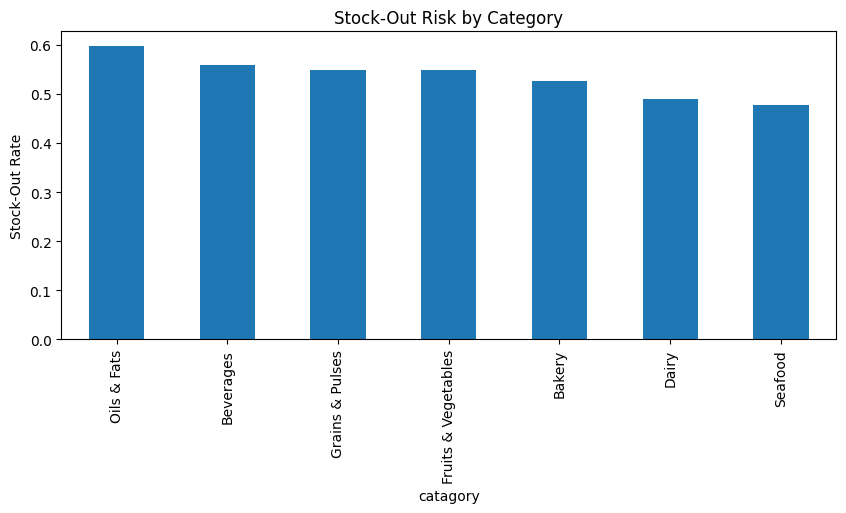

In [19]:
category_analysis["stockout_flag"].plot(kind="bar", figsize=(10,4))
plt.title("Stock-Out Risk by Category")
plt.ylabel("Stock-Out Rate")
plt.show()

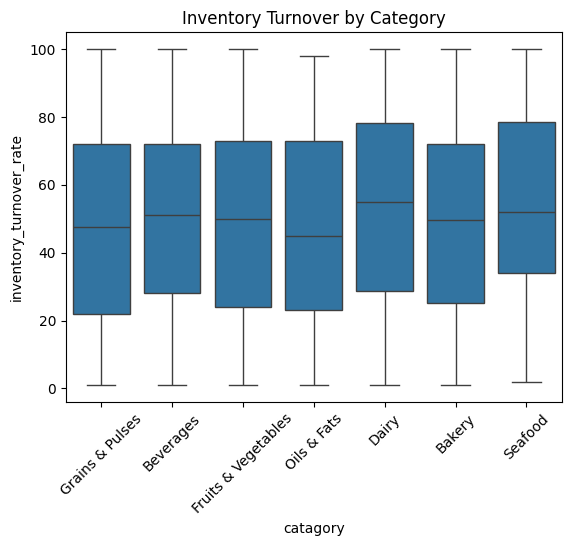

In [21]:
sns.boxplot(x="catagory", y="inventory_turnover_rate", data=df)
plt.xticks(rotation=45)
plt.title("Inventory Turnover by Category")
plt.show()

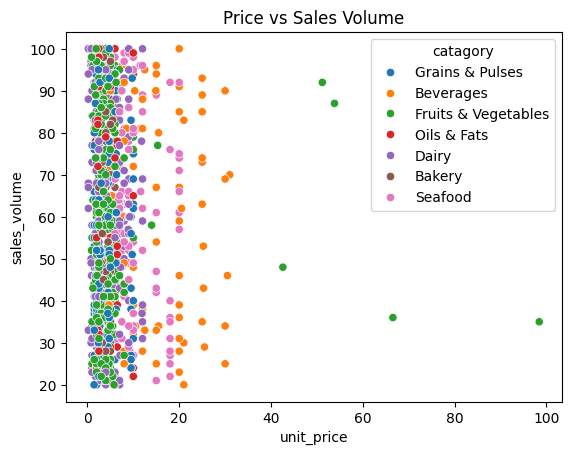

In [23]:
sns.scatterplot(
    x="unit_price",
    y="sales_volume",
    hue="catagory",
    data=df
)
plt.title("Price vs Sales Volume")
plt.show()

In [24]:
warehouse_analysis = (
    df.groupby("warehouse_location")[["stockout_flag", "overstock_flag"]]
    .mean()
)

warehouse_analysis

,stockout_flag,overstock_flag
warehouse_location,,
0 Delladonna Place,1.0,0.0
0 Fordem Place,0.0,1.0
0 Larry Terrace,0.0,0.0
0 Lawn Parkway,1.0,0.0
0 Lerdahl Parkway,0.0,1.0
...,...,...
99 Twin Pines Alley,1.0,0.0
992 East Point,1.0,0.0
993 Kensington Drive,0.0,1.0


## 2.10 Summary Insights
• Identified significant stock-out and overstock patterns across categories              
• Found imbalance between sales demand and inventory allocation                  
• Observed category-specific turnover inefficiencies                                        
• Highlighted pricing impact on demand velocity